# How to create an Open3D Point Cloud from NumPy arrays?

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d

# Update matplotlib parameters to use LateX.
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{amssymb}')
plt.rc('font',family='serif')
plt.rc('font',family='DejaVu Sans')

## Define the dimensions of the box

In [19]:
length = 0.3 # [m]
width = 0.5 # [m]
height = 0.7 # [m]
resolution = 0.05 # [m]

In [20]:
# Create arrays for each dimension with the specified dimensions sampled at the specified resolution.
x = np.arange(start=0., stop=length, step=resolution, dtype=np.float64) # array of length d_x
print(f"{np.shape(x)=}")
y = np.arange(start=0., stop=width, step=resolution, dtype=np.float64) # array of length d_y
print(f"{np.shape(y)=}")
z = np.arange(start=0., stop=height, step=resolution, dtype=np.float64) # array of length d_z
print(f"{np.shape(z)=}")


np.shape(x)=(6,)
np.shape(y)=(10,)
np.shape(z)=(14,)


## Cuboid faces

In [21]:
# Faces 1 and 3
# We create a rectangular grid of x and y coordinates for the given length and width.
xy_x, xy_y = np.meshgrid(x, y) # Both xy_x and xy_y have shape d_x by d_y
print(f"{np.shape(xy_x)=}")
print(f"{np.shape(xy_y)=}")
#TODO: Explain how the dimensions work.
# We create the corresponding grid of z coordinates for face 1, which is aligned with the z=0 plane.
xy_z_1 = np.zeros_like(xy_x)
print(f"{np.shape(xy_z_1)=}")

np.shape(xy_x)=(10, 6)
np.shape(xy_y)=(10, 6)
np.shape(xy_z_1)=(10, 6)


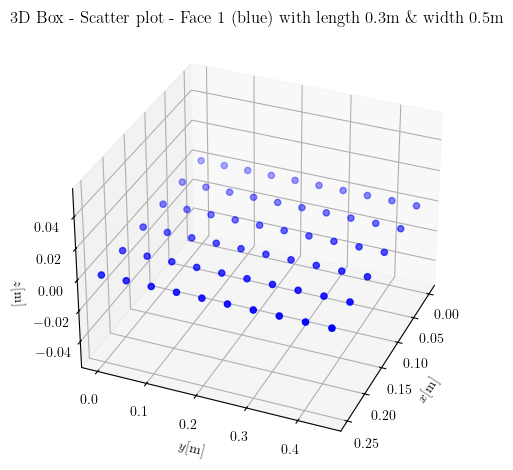

In [22]:
# Visualize face 1 as a point cloud.
fig = plt.figure(1)
ax = fig.add_subplot(projection='3d')
plt.title(f'3D Box - Scatter plot - Face 1 (blue) with length ${length}$m \& width ${width}$m')
ax.scatter(xy_x, xy_y, xy_z_1, marker=r'o', color='blue')
ax.set_xlabel(r'$x\mathrm{[m]}$')
ax.set_ylabel(r'$y\mathrm{[m]}$')
ax.set_zlabel(r'$z\mathrm{[m]}$')
ax.view_init(32, 22.5)  # azimuth and elevation angles for viewing.
plt.tight_layout()
plt.show()

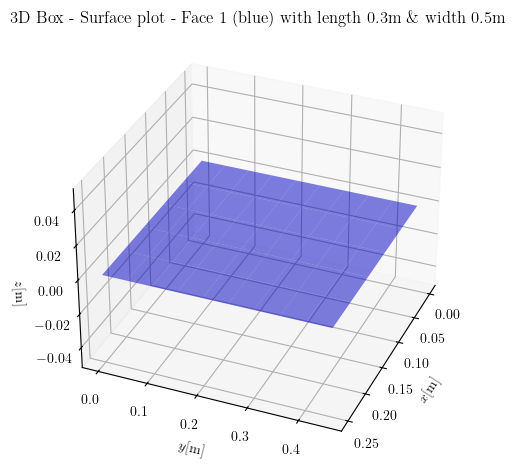

In [23]:
# Visualize face 1 as a surface.
fig = plt.figure(2)
ax = fig.add_subplot(projection='3d')
plt.title(f'3D Box - Surface plot - Face 1 (blue) with length ${length}$m \& width ${width}$m')
ax.plot_surface(xy_x, xy_y, xy_z_1, alpha=0.5, color='blue')
ax.set_xlabel(r'$x\mathrm{[m]}$')
ax.set_ylabel(r'$y\mathrm{[m]}$')
ax.set_zlabel(r'$z\mathrm{[m]}$')
ax.view_init(32, 22.5) # azimuth and elevation angles for viewing.
plt.tight_layout()
plt.show()

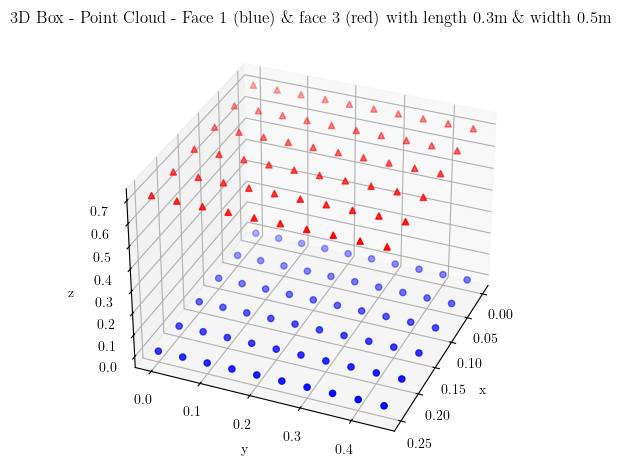

In [24]:
# Get the corresponding z-coordinates for the points in face 3.
xy_z_3 = height*np.ones_like(xy_x)

# Visualize the point clouds for face 1 and face 3.
fig = plt.figure(3)
ax = fig.add_subplot(projection='3d')
plt.title(f'3D Box - Point Cloud - Face 1 (blue) \& face 3 (red) with length ${length}$m \& width ${width}$m')
ax.scatter(xy_x, xy_y, xy_z_1, marker=r'o', color='blue')
ax.scatter(xy_x, xy_y, xy_z_3, marker=r'^', color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(32, 22.5)  # azimuth and elevation angles for viewing.
plt.tight_layout()
plt.show()

In [25]:
 # Collect the x, y and z coordinates arrays into an array of shape d_x * d_y * d_z x 3
face_1_arr = np.vstack((np.reshape(xy_x, -1),
                        np.reshape(xy_y, -1),
                        np.reshape(xy_z_1, -1),
                        ))
print(f"{np.shape(face_1_arr)=}")

np.shape(face_1_arr)=(3, 60)


In [26]:
# Create a 3D point cloud using Open3D
face_1_pcd = o3d.geometry.PointCloud()
#TODO: explain why we need to transpose here.
face_1_pcd.points = o3d.utility.Vector3dVector(face_1_arr.T)
# The colour is set in RGB space in the range [0, 1]
face_1_pcd.paint_uniform_color([1, 0.706, 0])

PointCloud with 60 points.

In [27]:
# Calculate normals to improve illumination in data visualization
face_1_pcd.estimate_normals(
        search_param=o3d.geometry.KDTreeSearchParamHybrid(
            radius=0.05,
            max_nn=16
        ),
        fast_normal_computation=True,
)
o3d.visualization.draw_geometries(
        geometry_list=[face_1_pcd],
        window_name='Face 1 Point Cloud',
        point_show_normal=False,)


## Build remaining faces of the cuboid
Face 3 is opposite to face 1. Faces 1 and 3 are in the z-plane.
Face 2 shares an edge with face 1 and the opposite edge with face 3. Faces 2 and 4 are in the x-plane.
Faces 5 and 6 are in the y-plane.

In [28]:
face_3_arr = np.vstack((np.reshape(xy_x, -1),
                        np.reshape(xy_y, -1),
                        np.reshape(xy_z_3, -1),
                        ))
# Create a 3D point cloud using Open3D
face_3_pcd = o3d.geometry.PointCloud()
face_3_pcd.points = o3d.utility.Vector3dVector(face_3_arr.T)

yz_y, yz_z = np.meshgrid(y, z) # Both yz_y and yz_z have shape d_y by d_z

# We create the corresponding grid of x coordinates for face 2, which is aligned with the x=0 plane.
yz_x_1 = np.zeros_like(yz_y)
face_2_arr = np.vstack((np.reshape(yz_x_1, -1),
                        np.reshape(yz_y, -1),
                        np.reshape(yz_z, -1),
                        ))
# Create a 3D point cloud using Open3D
face_2_pcd = o3d.geometry.PointCloud()
face_2_pcd.points = o3d.utility.Vector3dVector(face_2_arr.T)

# Get the corresponding x-coordinates for the points in face 4.
yz_x_4 = length*np.ones_like(yz_y)
face_4_arr = np.vstack((np.reshape(yz_x_4, -1),
                        np.reshape(yz_y, -1),
                        np.reshape(yz_z, -1),
                        ))
# Create a 3D point cloud using Open3D
face_4_pcd = o3d.geometry.PointCloud()
face_4_pcd.points = o3d.utility.Vector3dVector(face_4_arr.T)


xz_x, xz_z = np.meshgrid(x, z) # Both yz_x and yz_z have shape d_x by d_z
# We create the corresponding grid of x coordinates for face 5, which is aligned with the y=0 plane.
xz_y_5 = np.zeros_like(xz_x)
face_5_arr = np.vstack((np.reshape(xz_x, -1),
                        np.reshape(xz_y_5, -1),
                        np.reshape(xz_z, -1),
                        ))
# Create a 3D point cloud using Open3D
face_5_pcd = o3d.geometry.PointCloud()
face_5_pcd.points = o3d.utility.Vector3dVector(face_5_arr.T)

# Get the corresponding x-coordinates for the points in face 6.
xz_y_6 = width*np.ones_like(xz_x)
face_6_arr = np.vstack((np.reshape(xz_x, -1),
                        np.reshape(xz_y_6, -1),
                        np.reshape(xz_z, -1),
                        ))
# Create a 3D point cloud using Open3D
face_6_pcd = o3d.geometry.PointCloud()
face_6_pcd.points = o3d.utility.Vector3dVector(face_6_arr.T)

## Merge together cuboid faces' point cloud
Each face shares 4 common edges with other faces. So the merged point cloud will contain duplicate points. We remove duplicated points lying on the edges.

In [29]:
cuboid_pcd = face_1_pcd + face_2_pcd + face_3_pcd + face_4_pcd + face_5_pcd + face_6_pcd
# Remove duplicated points beloging to shared edges.
cuboid_pcd.remove_duplicated_points()

PointCloud with 539 points.

In [30]:
# Calculate normals to improve illumination in data visualization
cuboid_pcd.estimate_normals(
        search_param=o3d.geometry.KDTreeSearchParamHybrid(
            radius=0.05,
            max_nn=16
        ),
        fast_normal_computation=True,
)
o3d.visualization.draw_geometries(
        geometry_list=[cuboid_pcd],
        window_name='Cuboid Point Cloud',
        point_show_normal=False,)


In [31]:
## Save the point cloud in a PLY file.

In [32]:
o3d.io.write_point_cloud("cuboid.ply", cuboid_pcd)

True